<a href="https://colab.research.google.com/github/ayushsyntax/ML_Journey/blob/main/FeatureEngineering(Normalization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']


In [20]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

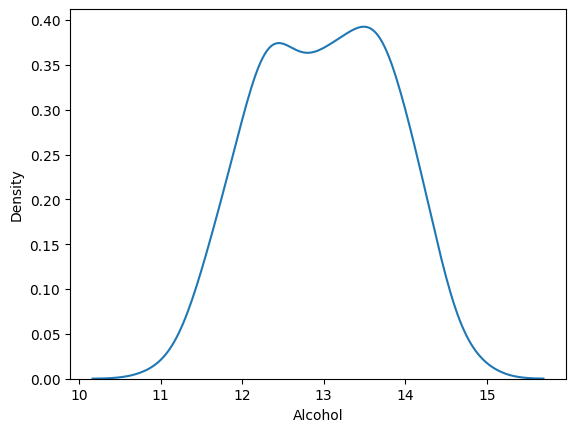

In [21]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

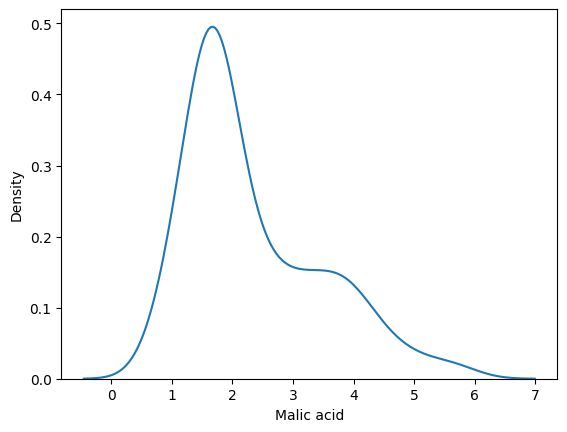

In [22]:
sns.kdeplot(df['Malic acid'])

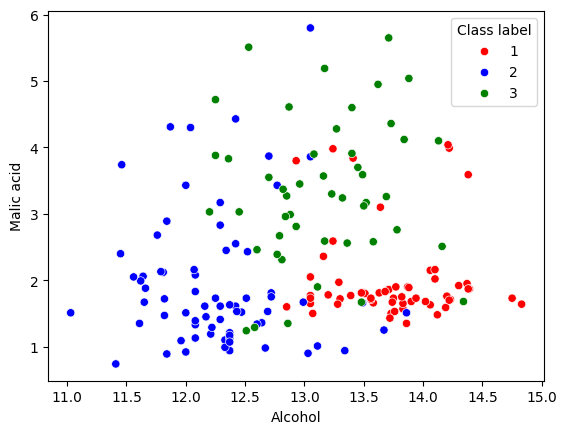

In [23]:
# Define the custom color palette
color_dict = {1: 'red', 2: 'blue', 3: 'green'}

# Create the scatterplot using keyword arguments
sns.scatterplot(
    data=df,
    x='Alcohol',
    y='Malic acid',
    hue='Class label',
    palette=color_dict
)

# Show the plot
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label',axis =1),df['Class label'],test_size=0.2,random_state=1)


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
np.round(X_train.describe(), 1)


,Alcohol,Malic acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.2
min,11.0,0.9
25%,12.3,1.6
50%,13.0,1.9
75%,13.7,3.2
max,14.8,5.8


In [28]:
np.round(X_train_scaled.describe(), 1)


,Alcohol,Malic acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.1
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


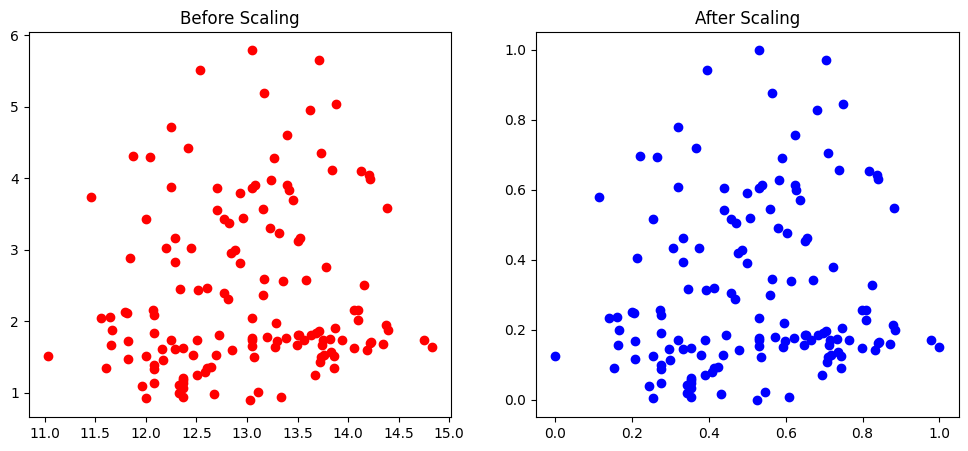

In [29]:
fig ,(ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,5))

ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],color='red')
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],color='blue')
ax2.set_title('After Scaling')
plt.show()

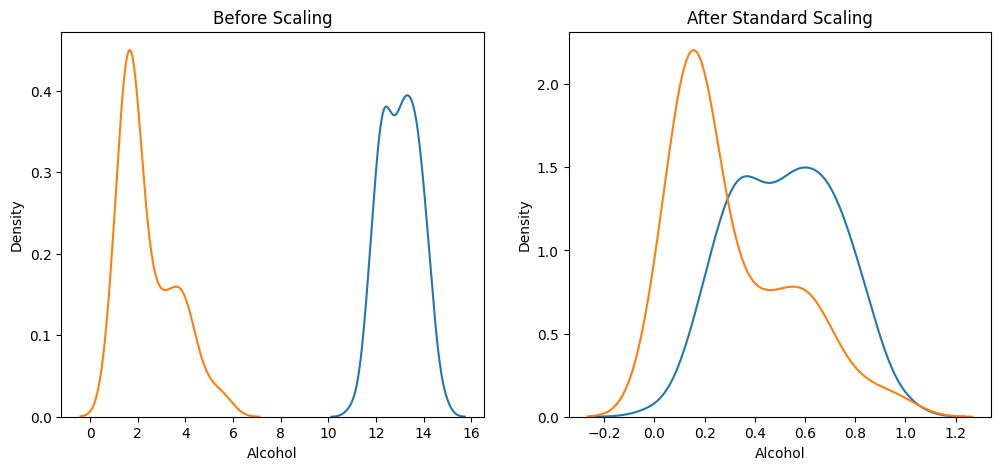

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

<Axes: title={'center': 'Alcohol Distribution After Standard Scaling'}, xlabel='Alcohol', ylabel='Density'>

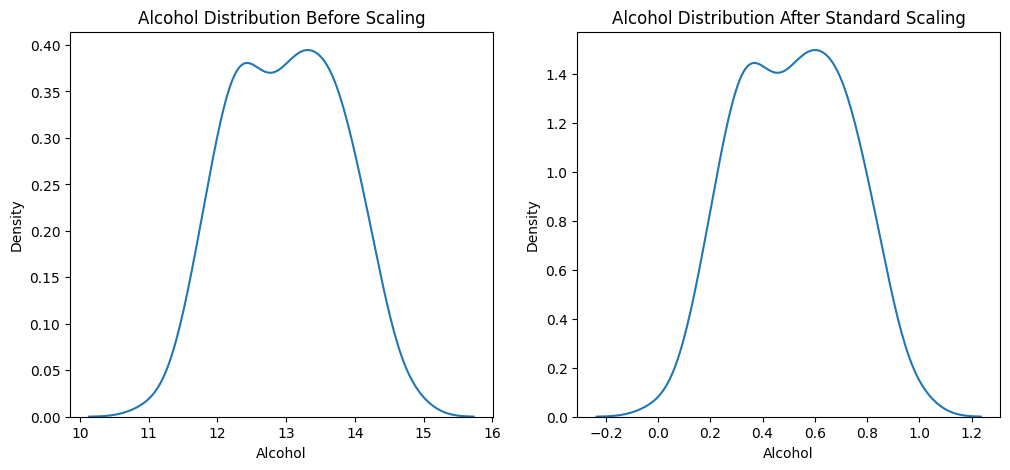

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)

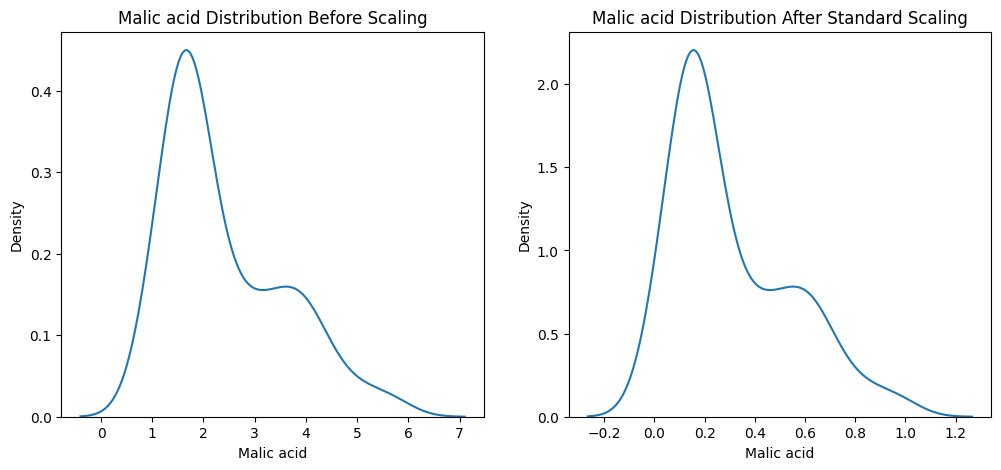

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

##Key Points About Normalization
####Purpose :
Scales or transforms data to ensure all features contribute equally to analysis or model training.

Prevents features with larger ranges from dominating smaller ones.

Common Techniques :
Min-Max Scaling : Scales data to a fixed range (e.g., [0, 1]).

Standardization (Z-Score) : Centers data around zero with unit variance.
Robust Scaling : Uses median and IQR to handle outliers effectively.

Improves Algorithm Performance :
Enhances convergence for gradient-based methods (e.g., neural networks).

Essential for distance-based algorithms (e.g., KNN, k-means, SVM).

Handles Outliers :
Min-Max Scaling is sensitive to outliers.
Standardization and Robust Scaling are more robust to extreme values.

Preserves Relationships :
Maintains relationships between features while adjusting their scales.

Ensures compatibility with dimensionality reduction techniques like PCA.

Prevents Numerical Instability :
Reduces computational issues caused by large differences in feature scales.

Reversibility :
Normalization can be reversed if scaling parameters (e.g., min, max, mean, std) are saved.

Domain-Specific Applications :
Image processing: Pixel values scaled to [0, 1] or [-1, 1].

NLP: Word embeddings normalized to unit vectors.
Time series: Detrending or deseasonalizing data.
Algorithm Compatibility :
Required for algorithms like neural networks, KNN, SVM, and PCA.
Not always necessary for tree-based models (e.g., decision trees, random forests).

Flexibility :
Adaptable to different data types (continuous, categorical, sparse).
Can be combined with other preprocessing steps (e.g., encoding, imputation).

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Example dataset
data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)

print("Original Data:")
print(df)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
print("\nData after Min-Max Scaling:")
print(df_minmax)

# Standardization
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
print("\nData after Standardization:")
print(df_standardized)

# Robust Scaling
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
print("\nData after Robust Scaling:")
print(df_robust)

Original Data:
   Feature1  Feature2
0        10       100
1        20       200
2        30       300
3        40       400
4        50       500

Data after Min-Max Scaling:
   Feature1  Feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00

Data after Standardization:
   Feature1  Feature2
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214

Data after Robust Scaling:
   Feature1  Feature2
0      -1.0      -1.0
1      -0.5      -0.5
2       0.0       0.0
3       0.5       0.5
4       1.0       1.0


##Choosing the Right Method
Use Min-Max Scaling if you need data in a specific range (e.g., [0, 1]).
Use Standardization for algorithms like PCA, SVM, or neural networks.
Use Robust Scaling if your data contains outliers.